Gaussian discriminant analysis con diverse matrici di covarianza per le distribuzioni delle due classi e conseguente separatore quadratico. Implementata in scikit-learn. Valutazione con cross validation. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
import sklearn.metrics as mt

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

Leggiamo i dati da un file csv in un dataframe pandas. I dati hanno 3 valori: i primi due corrispondono alle features e sono assegnati alle colonne x1 e x2 del dataframe; il terzo è il valore target, assegnato alla colonna t. Vengono poi creati una matrice X delle features e un vettore target t

In [4]:
# legge i dati in dataframe pandas
data = pd.read_csv("ex2data1.txt", header= None,delimiter=',', names=['x1','x2','t'])

# calcola dimensione dei dati
n = len(data)
n0 = len(data[data.t==0])

# calcola dimensionalità delle features
features = data.columns
nfeatures = len(features)-1

X = np.array(data[features[:-1]])
t = np.array(data['t'])


Visualizza il dataset.

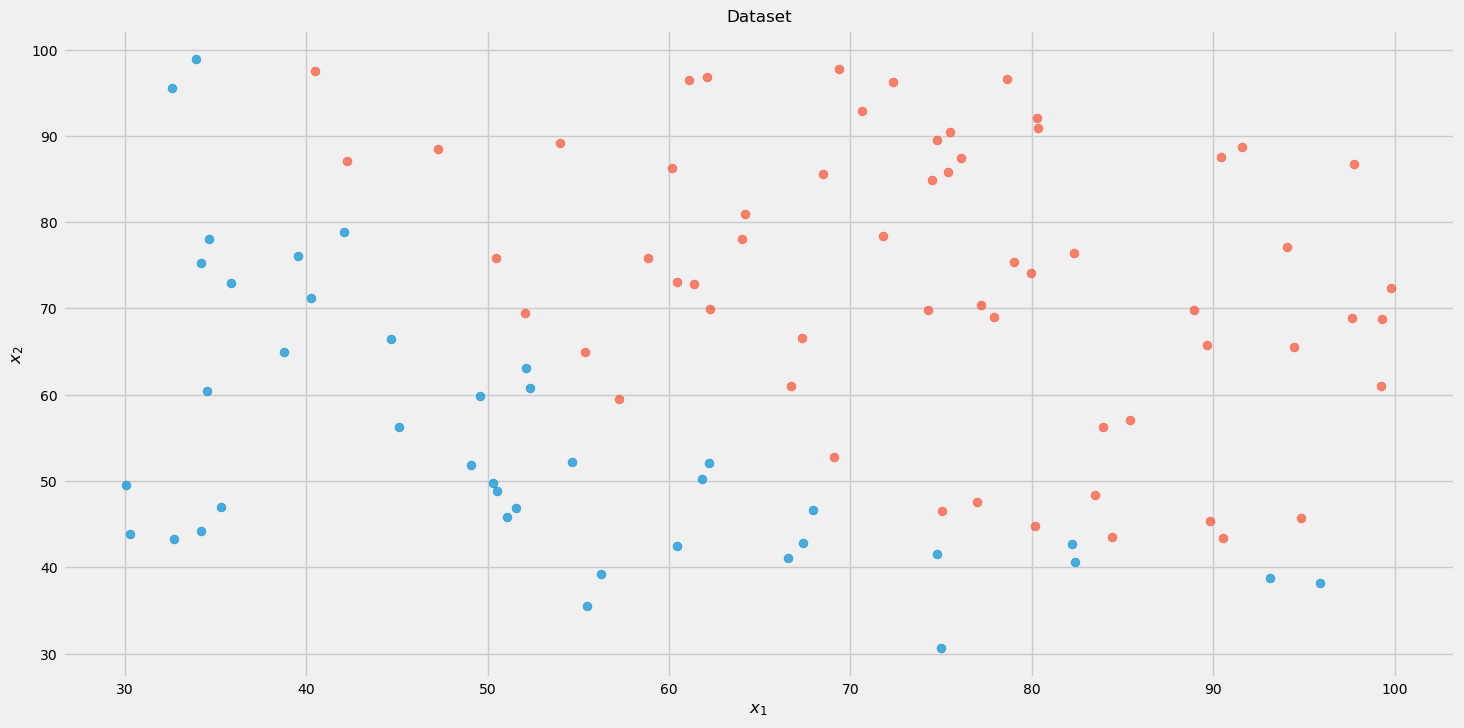

In [5]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, s=40, color=colors[0], alpha=.7)
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, s=40,c=colors[1], alpha=.7)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Dataset', fontsize=12)
plt.show()

Definisce un classificatore basato su GDA quadratica ed effettua il training sul dataset.

In [7]:
clf = QuadraticDiscriminantAnalysis(store_covariance=True)
clf = clf.fit(X, t)

Definiamo la griglia 100x100 da utilizzare per la visualizzazione delle varie distribuzioni.

In [8]:
# insieme delle ascisse dei punti
u = np.linspace(min(X[:,0]), max(X[:,0]), 100)
# insieme delle ordinate dei punti
v = np.linspace(min(X[:,1]), max(X[:,1]), 100)
# deriva i punti della griglia: il punto in posizione i,j nella griglia ha ascissa U(i,j) e ordinata V(i,j)
U, V = np.meshgrid(u, v)

Calcola sui punti della griglia le probabilità delle classi $p(x|C_0), p(x|C_1)$ e le probabilità a posteriori delle classi $p(C_0|x), p(C_1|x)$

In [9]:
# probabilità a posteriori delle due distribuzioni sulla griglia
Z = clf.predict_proba(np.c_[U.ravel(), V.ravel()])
pp0 = Z[:, 0].reshape(U.shape)
pp1 = Z[:, 1].reshape(V.shape)
# rapporto tra le probabilità a posteriori delle classi per tutti i punti della griglia
z=pp0/pp1   

# probabilità per le due classi sulla griglia
mu0 = clf.means_[0]
mu1 = clf.means_[1]
sigma0 = clf.covariance_[0]
sigma1 = clf.covariance_[1]
vf0=np.vectorize(lambda x,y:st.multivariate_normal.pdf([x,y],mu0,sigma0))
vf1=np.vectorize(lambda x,y:st.multivariate_normal.pdf([x,y],mu1,sigma1))
p0=vf0(U,V)
p1=vf1(U,V)

Visualizzazione della distribuzione di $p(x|C_0)$

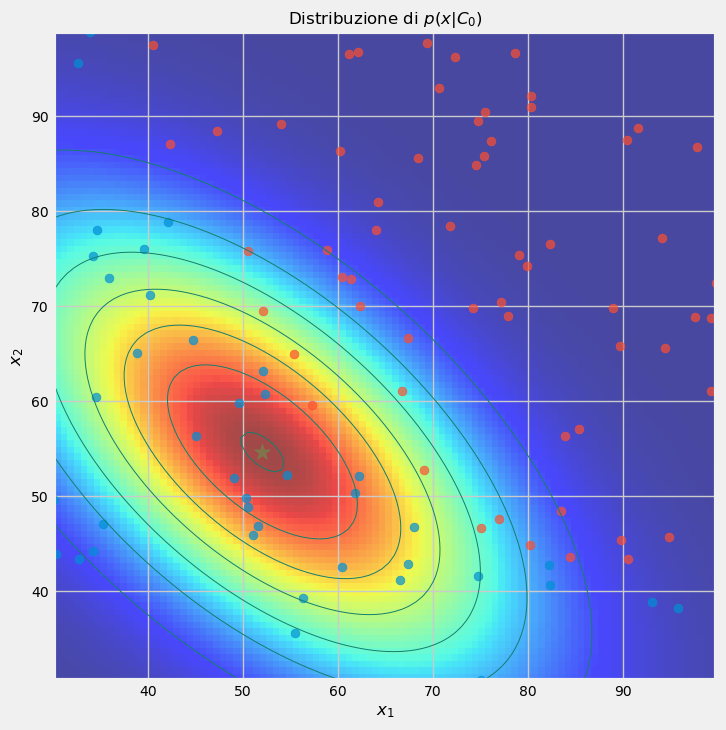

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
# inserisce una rappresentazione della probabilità della classe C0 sotto forma di heatmap
imshow_handle = plt.imshow(p0, origin='lower', extent=(min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])), alpha=.7)
plt.contour(U, V, p0, linewidths=[.7], colors=[colors[6]])
# rappresenta i punti del dataset
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, s=40, c=colors[0], alpha=.7)
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, s=40,c=colors[1], alpha=.7)
# rappresenta la media della distribuzione
ax.scatter(mu0[0], mu0[1], s=150,c=colors[3], marker='*', alpha=.6)
# inserisce titoli, etc.
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(u.min(), u.max())
plt.ylim(v.min(), v.max())
plt.title('Distribuzione di $p(x|C_0)$', fontsize=12)
plt.show()

Visualizzazione della distribuzione di $p(x|C1)$

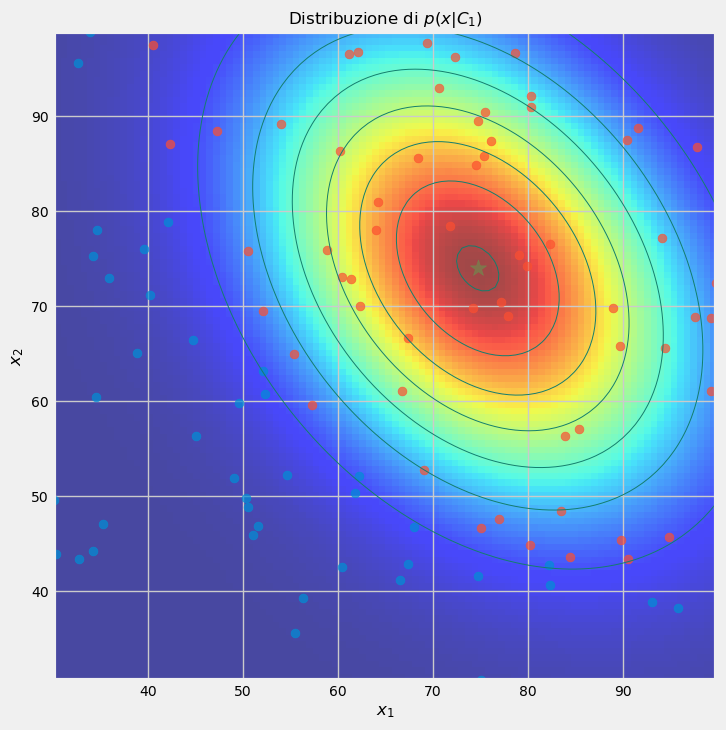

In [13]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
# inserisce una rappresentazione della probabilità della classe C0 sotto forma di heatmap
imshow_handle = plt.imshow(p1, origin='lower', extent=(min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])), alpha=.7)
plt.contour(U, V, p1, linewidths=[.7], colors=[colors[6]])
# rappresenta i punti del dataset
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, s=40, c=colors[0], alpha=.7)
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, s=40,c=colors[1], alpha=.7)
# rappresenta la media della distribuzione
ax.scatter(mu1[0], mu1[1], s=150,c=colors[3], marker='*', alpha=.6)
# inserisce titoli, etc.
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(u.min(), u.max())
plt.ylim(v.min(), v.max())
plt.title('Distribuzione di $p(x|C_1)$', fontsize=12)
plt.show()

Visualizzazione di $p(C_0|x)$

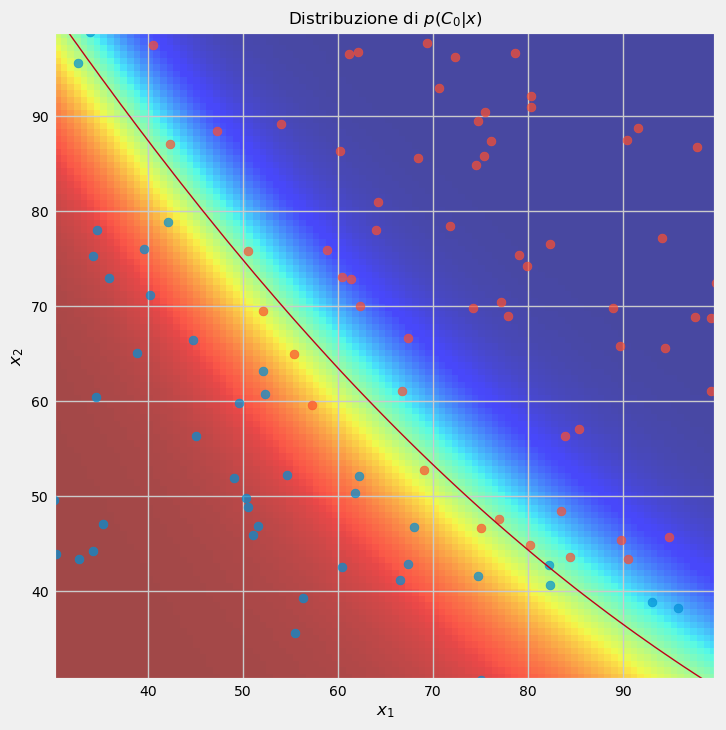

In [14]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
imshow_handle = plt.imshow(pp0, origin='lower', extent=(min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])), alpha=.7)
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, s=40, c=colors[0], alpha=.7)
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, s=40,c=colors[1], alpha=.7)
plt.contour(U, V, z, [1.0], colors=[colors[7]],linewidths=[1])
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(u.min(), u.max())
plt.ylim(v.min(), v.max())
plt.title("Distribuzione di $p(C_0|x)$", fontsize=12)
plt.show()

Visualizzazione di $p(C_1|x)$

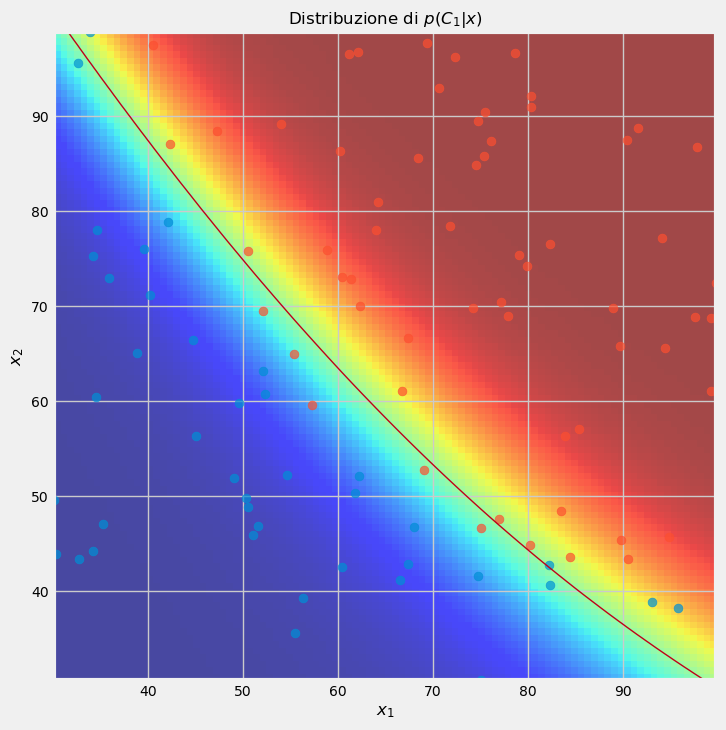

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
imshow_handle = plt.imshow(pp1, origin='lower', extent=(min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])), alpha=.7)
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, s=40, c=colors[0], alpha=.7)
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, s=40,c=colors[1], alpha=.7)
plt.contour(U, V, z, [1.0], colors=[colors[7]],linewidths=[1])
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(u.min(), u.max())
plt.ylim(v.min(), v.max())
plt.title("Distribuzione di $p(C_1|x)$", fontsize=12)
plt.show()

Applica la cross validation (5-fold) per calcolare l'accuracy effettuando la media sui 5 valori resituiti.

In [16]:
print("Accuracy: {0:5.3f}".format(cross_val_score(clf, X, t, cv=5, scoring='accuracy').mean()))

Accuracy: 0.910
